## LINEAR REGRESSION MODEL

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv(r"D:\workspace\python programs\train (7).csv")
test_df = pd.read_csv(r"D:\workspace\python programs\test (5).csv")
train_df

In [ ]:
cols = list(train_df.columns.values)

def feature_scale(df,train_df, columns):
    for col in columns:
        df[col] = ( df[col] - train_df[col].mean() ) / train_df[col].std()
    return df

train_df = feature_scale(train_df,train_df,cols)

test_df = feature_scale(test_df,train_df,cols)
x_test = test_df.drop('SalePrice', axis = 1).values
y_test = test_df['SalePrice'].values


In [ ]:
corr_matrix = train_df.corr()
corr_matrix.style.background_gradient(cmap = 'cool').format(precision = 2)

OverallQual - Overall material and finish quality of the house.

GrLivArea - Above-ground living area (square feet).

GarageCars - Number of cars that fit in the garage.

GarageArea - Size of the garage in square feet.

TotalBsmtSF - Total square feet of the basement area.

1stFlrSF - First-floor square footage.

FullBath - Number of full bathrooms.

TotRmsAbvGrd - Total number of rooms above ground.

YearBuilt - Year the house was built.

YearRemodAdd - Year the house was remodeled or added.

SalePrice - Sale price of the house (Target variable for prediction)

In [ ]:
price_corr_matrix = train_df.corr()['SalePrice']
price_corr_matrix

In [ ]:
def MSE(y,yp,n):
    error = np.sum((y - yp) ** 2)
    return (error / n)

def r2score(y,yp):
    TSS = np.sum((y - np.mean(y)) ** 2)
    SSE = np.sum((y - yp) ** 2)
    return (1 - (SSE/TSS))

In [ ]:
def batch_divider(feature_df, target_series, features, target, size):
    batches = []
    i = 0
    
    while i < len(feature_df):
        X_batch = pd.DataFrame(feature_df[i:i+size], columns = features)
        Y_batch = pd.DataFrame(target_series[i:i+size], columns = [target])
        batches.append((X_batch, Y_batch))
        i += size
        
    return batches

In [ ]:
def gradient_desc(df, LR, epochs, batch_size):
    features = list(df.columns.values)[:-1]
    target = df.columns.values[-1]

    X = df.drop(target, axis=1).values
    Y = df[target].values.reshape(-1)
    
    n, f = X.shape  
    m = np.zeros(f)  
    b = 0  

    batches = batch_divider(X, Y, features, target, batch_size)
    accuracy_list = []
    slope_list = []
    intercept_list = []

    for X_batch, Y_batch in batches:  

        X = X_batch.values
        Y = Y_batch.values.reshape(-1)

        n = len(X)
        learning_rate = LR  

        for epoch in range(epochs):  
            
            y_pred = np.dot(X, m) + b  
            error = y_pred - Y  

            m_gradient = (2/n) * np.dot(X.T, error)
            b_gradient = (2/n) * np.sum(error)

            m -= learning_rate * m_gradient
            b -= learning_rate * b_gradient

            if epoch % 50 == 0:
                cost_func = MSE(Y, y_pred, n)
                print(epoch, cost_func)

            learning_rate = learning_rate / (1 + 0.001 * epoch)

        accuracy = r2score(Y, y_pred)

        accuracy_list.append(accuracy)
        slope_list.append(m)
        intercept_list.append(b)

        print(f"\n---------\nNEXT BATCH {accuracy}\n---------")

    return slope_list, intercept_list, batches, accuracy_list


In [ ]:
LR = 0.20
epochs = 200
batch_size = 100

m_list, b_list, batches, accuracy_list = gradient_desc(train_df, LR, epochs, batch_size)

for m, b, accuracy in zip(m_list, b_list, accuracy_list):
    if accuracy == max(accuracy_list):
        m, b = m, b
m, b, accuracy

In [ ]:
i = 1
print(accuracy_list)
for batch, accuracy in zip(batches,accuracy_list):
    plt.scatter(i, accuracy)
    i+=1
plt.xlabel('BATCH NUMBERS')
plt.ylabel('ACCURACY')
plt.show()

In [ ]:
color = ['red','blue','green','black','orange','magenta','blueviolet','lime','cyan','deeppink']
i = 0
for col in cols:
    if col != 'SalePrice':
        plt.scatter(train_df[col], train_df['SalePrice'])
        plt.scatter(train_df[col], train_df['SalePrice'], color = color[i], label = col)
        plt.xlabel("ALL FEATURES")
        plt.ylabel("SALE PRICE")
    i+=1
plt.legend(title = 'FEATURES')
plt.show()

In [ ]:
for col in cols:
    plt.scatter(train_df[col], train_df['SalePrice'])
    plt.xlabel(col.upper())  
    plt.ylabel("SALE PRICE")
    plt.show()

In [ ]:
x = train_df.drop('SalePrice',axis = 1).values
y = train_df['SalePrice'].values.reshape(-1,1)

In [ ]:
plt.scatter(train_df['YearRemodAdd'],y)
plt.scatter(train_df['YearRemodAdd'], np.dot(x, m) + b, color='red')
accuracy = r2score(y,np.dot(x, m) + b)*100
print("Accuracy: %.2f%%"%accuracy)

In [ ]:
plt.scatter(test_df['YearRemodAdd'],y_test)
plt.scatter(test_df['YearRemodAdd'], np.dot(x_test, m) + b, color='red')
accuracy = r2score(y_test,np.dot(x_test,m)+b)*100
print("Accuracy: %.2f%%"%accuracy)

In [ ]:
x_points = train_df['YearRemodAdd']
plt.scatter(x_points,y)
plt.plot(list(range(1900,2040)), [m[0]*x + b for x in range(1900,2040)], color='red')
plt.show()
m

In [ ]:
x_test_points = test_df['YearRemodAdd']
plt.scatter(x_test_points, y_test)
plt.plot(list(range(-2, 2)), [m[0] * x + b for x in range(-2, 2)], color='red')
plt.show()

0 1.2638914470835887
50 0.1482627870411058
100 0.14766764795064355
150 0.14762153526167537

---------
NEXT BATCH 0.8831212911085201
---------
0 0.18723028313169618
50 0.13738916032081655
100 0.13721332178531542
150 0.13719698715402284

---------
NEXT BATCH 0.8869325049925204
---------
0 0.22347620907140497
50 0.13405681760955693
100 0.13341139809419156
150 0.1333558770879604

---------
NEXT BATCH 0.8395900403920977
---------
0 0.13596824316477252
50 0.10360304435365132
100 0.10341168619508752
150 0.10339093113290264

---------
NEXT BATCH 0.8306721081948805
---------
0 0.25136447007736207
50 0.17756289022858787
100 0.17725305127943597
150 0.17722378693894833

---------
NEXT BATCH 0.8233808973153757
---------
0 0.30067996534337066
50 0.16895332989121772
100 0.16794817350334337
150 0.1678274196579212

---------
NEXT BATCH 0.8626435526128652
---------
0 0.290191463265373
50 0.16517267069422
100 0.16423450930263217
150 0.16395575275560564

---------
NEXT BATCH 0.8016768369850288
---------
0

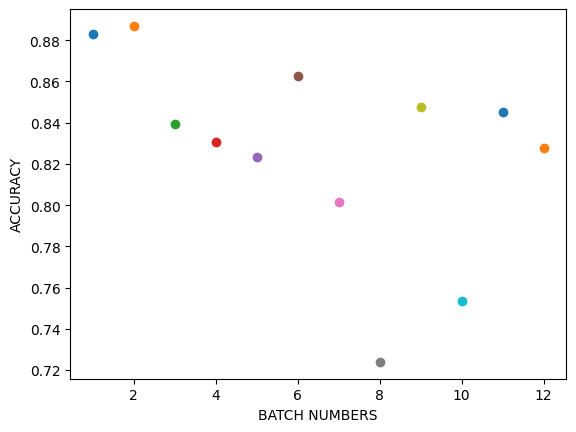

Accuracy: 66.51%
Accuracy: -529.04%


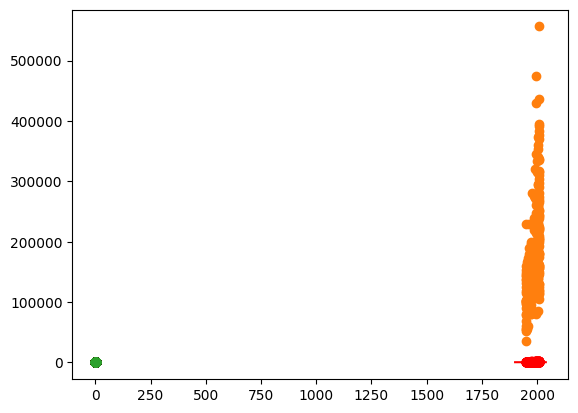

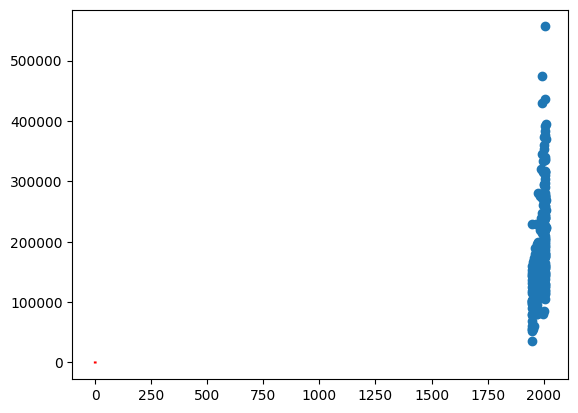

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train_df = pd.read_csv(r"D:\workspace\python programs\train (7).csv")
test_df = pd.read_csv(r"D:\workspace\python programs\test (5).csv")

cols = list(train_df.columns.values)

def feature_scale(df, ref_df, columns):
    for col in columns:
        df[col] = (df[col] - ref_df[col].mean()) / ref_df[col].std()
    return df

train_df = feature_scale(train_df, train_df, cols)
test_df = feature_scale(test_df, train_df, cols)

x_test = test_df.drop('SalePrice', axis=1).values
y_test = test_df['SalePrice'].values.reshape(-1, 1)

def MSE(y, yp, n):
    return np.sum((y - yp) ** 2) / n

def r2score(y, yp):
    TSS = np.sum((y - np.mean(y)) ** 2)
    SSE = np.sum((y - yp) ** 2)
    return 1 - (SSE / TSS)

def batch_divider(feature_df, target_series, features, target, size):
    batches = []
    i = 0
    while i < len(feature_df):
        X_batch = pd.DataFrame(feature_df[i:i+size], columns=features)
        Y_batch = pd.DataFrame(target_series[i:i+size], columns=[target])
        batches.append((X_batch, Y_batch))
        i += size
    return batches

def gradient_desc(df, LR, epochs, batch_size):
    features = list(df.columns.values)[:-1]
    target = df.columns.values[-1]

    X = df.drop(target, axis=1).values
    Y = df[target].values.reshape(-1, 1)

    n, f = X.shape  
    m = np.zeros((f, 1))  
    b = 0  

    batches = batch_divider(X, Y, features, target, batch_size)
    accuracy_list = []
    slope_list = []
    intercept_list = []

    for X_batch, Y_batch in batches:  
        X = X_batch.values
        Y = Y_batch.values.reshape(-1, 1)

        n = len(X)
        learning_rate = LR  

        for epoch in range(epochs):  
            y_pred = np.dot(X, m) + b  
            error = y_pred - Y  

            m_gradient = (2/n) * np.dot(X.T, error)
            b_gradient = (2/n) * np.sum(error)

            m -= learning_rate * m_gradient
            b -= learning_rate * b_gradient

            if epoch % 50 == 0:
                cost_func = MSE(Y, y_pred, n)
                print(epoch, cost_func)

            learning_rate *= 0.99  

        accuracy = r2score(Y, y_pred)

        accuracy_list.append(accuracy)
        slope_list.append(m)
        intercept_list.append(b)

        print(f"\n---------\nNEXT BATCH {accuracy}\n---------")

    return slope_list, intercept_list, batches, accuracy_list

LR = 0.20
epochs = 200
batch_size = 100

m_list, b_list, batches, accuracy_list = gradient_desc(train_df, LR, epochs, batch_size)

m, b = max(zip(m_list, b_list, accuracy_list), key=lambda x: x[2])[:2]

i = 1
print(accuracy_list)
for batch, accuracy in zip(batches, accuracy_list):
    plt.scatter(i, accuracy)
    i += 1
plt.xlabel('BATCH NUMBERS')
plt.ylabel('ACCURACY')
plt.show()

x = train_df.drop('SalePrice', axis=1).values
y = train_df['SalePrice'].values.reshape(-1, 1)

plt.scatter(train_df['YearRemodAdd'], y)
plt.scatter(train_df['YearRemodAdd'], np.dot(x, m) + b, color='red')
accuracy = r2score(y, np.dot(x, m) + b) * 100
print("Accuracy: %.2f%%" % accuracy)

plt.scatter(test_df['YearRemodAdd'], y_test)
plt.scatter(test_df['YearRemodAdd'], np.dot(x_test, m) + b, color='red')
accuracy = r2score(y_test, np.dot(x_test, m) + b) * 100
print("Accuracy: %.2f%%" % accuracy)

x_points = train_df['YearRemodAdd']
plt.scatter(x_points, y)
plt.plot(list(range(1900, 2040)), [m[0] * x + b for x in range(1900, 2040)], color='red')
plt.show()

x_test_points = test_df['YearRemodAdd']
plt.scatter(x_test_points, y_test)
plt.plot(list(range(-2, 2)), [m[0] * x + b for x in range(-2, 2)], color='red')
plt.show()


In [1]:
i = 0
for col in cols:
    if col != 'SalePrice':
        plt.scatter(train_df[col], train_df['SalePrice'])
        plt.scatter(train_df[col], train_df['SalePrice'], color = color[i], label = col)
        plt.xlabel("ALL FEATURES")
        plt.ylabel("SALE PRICE")
    i+=1
plt.legend(title = 'FEATURES')
plt.plot(list(range(-4,6)), [m[0]*x + b for x in range(-4,6)], color='red')
plt.show()

NameError: name 'cols' is not defined

In [ ]:
i = 0
for col in cols:
    if col != 'SalePrice':
        plt.scatter(test_df[col], test_df['SalePrice'])
        plt.scatter(test_df[col], test_df['SalePrice'], color = color[i], label = col)
        plt.xlabel("ALL FEATURES")
        plt.ylabel("SALE PRICE")
    i+=1
plt.legend(title = 'FEATURES')
plt.plot(list(range(-4,6)), [m[0]*x + b for x in range(-4,6)], color='red')
plt.show()